In [1]:
import sqlite3
import json
import graph_tool.all as gt

con = sqlite3.connect("../test.sqlite")

cursor = con.cursor()

In [2]:
all_data = cursor.execute("SELECT * FROM subject s JOIN follow_edges f on s.did=f.did;").fetchall()

In [3]:
all_data[1000]

('did:plc:lwwubp22mrfznmqryppihsel',
 'pizzaldi.bsky.social',
 'Rizaldi',
 '🇮🇩',
 'https://cdn.bsky.social/imgproxy/8aERxFXubrg-ZbX5miS89jqucLVnubrKRsEOg3UHWOk/rs:fill:1000:1000:1:0/plain/bafkreibjqekcshxarudjs7fmro74bnpqjvglh6y4b5ggsr4mtdfhrfxl3e@jpeg',
 '2023-04-15T05:18:47.201Z',
 '2023-04-15T12:40:07.622Z',
 'did:plc:lwwubp22mrfznmqryppihsel',
 '["did:plc:z72i7hdynmk6r22z27h6tvur"]',
 '2023-04-15T12:40:07.622Z')

In [4]:
df_rows = []
edgelist = []

for row in all_data:
    did, handle, display_name, description, avatar_url, indexed_at, date_updated, _, following_str, _ = row

    following = json.loads(following_str)

    if len(following) > 10_000:
        print(did, handle)

did:plc:64xauqgt5y6ixtuuvmrimbaf mediciners.org
did:plc:gavqr7yuapgfhfr4hvosjyoh nelsonbeans.com
did:plc:vswzxels2zstni5lntb6rpfc kry.bsky.social
did:plc:ioddc2qmd7762amwufgt4evl msrodrigo.com
did:plc:5t2x7mmh4ofspj7apwpgif5l anku.bestie.social
did:plc:2rhgf24qcpdxuscon3gwp6it jsonpreet.bestie.social
did:plc:72g57t2jyqvy52w273mvfldl mosesogunsanya.com
did:plc:4usvqnzxonnvz2hyvx2msr4h amazingca.dev
did:plc:36tmqxxepo5jlx54peygtx6i cats.bsky.social
did:plc:jmsnrrykqrtsnd4qh6yirxzz discovery.bsky.social
did:plc:ylmbufmy5btcigjk27oup4zl nature.bsky.social
did:plc:iijrtk7ocored6zuziwmqq3c shinyakato.dev
did:plc:vm7wifn25awqm2zrury5pudg thedogist.bsky.social
did:plc:pdac24jyypwultrppa457voe vishal.bsky.social
did:plc:wbuezhu46trfmg5hduqphn3r miranda.bsky.social
did:plc:cm4bwax4evxmkiuwxvvkvlmx tho.bsky.social


In [5]:
did_to_index = {d[0]: i for i, d in enumerate(all_data)}

In [6]:
len(did_to_index)

22350

In [7]:
g = gt.Graph(directed=True)

In [8]:
df_rows = []
edgelist = []

for row in all_data:
    did, handle, display_name, description, avatar_url, indexed_at, date_updated, _, following_str, _ = row

    following = json.loads(following_str)

    for f in following:
        if f in did_to_index:
            edgelist.append((did_to_index[did], did_to_index[f]))

    df_rows.append(dict(did=did, handle=handle, display_name=display_name, description=description, avatar_url=avatar_url, indexed_at=indexed_at, date_updated=date_updated))

In [9]:
import pandas as pd
df = pd.DataFrame(df_rows)

In [10]:
df

did                    handle  \
0      did:plc:7axcqwj4roha6mqpdhpdwczx               wang.social   
1      did:plc:q32gd4bcfqfjor2kew6sdwkl         zoink.bsky.social   
2      did:plc:xkzgysgrsns6f26uj7sbqnku           vgr.bsky.social   
3      did:plc:p6srbxkkbn2sgtvha724bqjz  igorbrigadir.bsky.social   
4      did:plc:imvk33pgsyoig6cvt6omwb3t              visakanv.com   
...                                 ...                       ...   
22345  did:plc:wbuezhu46trfmg5hduqphn3r       miranda.bsky.social   
22346  did:plc:ewrdbl7me6fp45vi6cie4hg2       euxenus.bsky.social   
22347  did:plc:dsamd6hpkl46pd2s6st5wccc    eigenrobot.bsky.social   
22348  did:plc:qpfetunurukotvrorltefdyf  ryanhoulihan.bsky.social   
22349  did:plc:cm4bwax4evxmkiuwxvvkvlmx           tho.bsky.social   

             display_name                                        description  \
0                Peter W🤓  Anaconda, Python, PyData, PyScript; Center for...   
1             Dylan Field                                       CEO at Figma   
2           Venkatesh Rao                          Blogger at ribbonfarm.com   
3           Igor Brigadir                            @igorbrigadir elsewhere   
4                    visa   Author of FRIENDLY AMBITIOUS NERD and INTROSPECT   
...                   ...                                                ...   
22345             Miranda  • Host\n• Writer\n• Contact: heymiranda@outloo...   
22346                exns  building a Second Brain, dissecting the Global...   
22347  springtime for bmo                                               hmmm   
22348     Ryan Houlihan 🧜  Non-binary, AuDHD, and kind of a bitch. I love...   
22349    Thomas Pockrandt  Tech Advisor & Digital Strategist 🦾\n\nhttps:/...   

                                              avatar_url  \
0      https://cdn.bsky.social/imgproxy/Ax1WlVxdG7eMJ...   
1      https://cdn.bsky.social/imgproxy/M54YEzR28WcAr...   
2      https://cdn.bsky.social/imgproxy/P3xUm9twTDxS6...   
3      https://cdn.bsky.social/imgproxy/T2of2yoY5CNbO...   
4      https://cdn.bsky.social/imgproxy/vCZQbHRoTqRZb...   
...                                                  ...   
22345  https://cdn.bsky.social/imgproxy/O4Xz-P9HG85c8...   
22346  https://cdn.bsky.social/imgproxy/NYzw2XKo8kNTP...   
22347  https://cdn.bsky.social/imgproxy/f3unPuRwfvs4w...   
22348  https://cdn.bsky.social/imgproxy/XSRKSx8yTzYMF...   
22349  https://cdn.bsky.social/imgproxy/vNz-qGDXF4UYm...   

                     indexed_at              date_updated  
0      2023-03-03T13:04:28.807Z  2023-04-15T12:36:57.160Z  
1      2023-03-01T00:59:23.097Z  2023-04-15T12:36:58.166Z  
2      2023-03-27T17:51:45.229Z  2023-04-15T12:36:58.410Z  
3      2023-04-11T21:52:15.049Z  2023-04-15T12:36:58.643Z  
4      2023-04-10T13:48:59.636Z  2023-04-15T12:36:58.873Z  
...                         ...                       ...  
22345  2023-04-06T21:47:58.889Z  2023-04-15T13:55:23.906Z  
22346  2023-04-13T18:17:49.007Z  2023-04-15T13:55:24.583Z  
22347  2023-04-11T05:07:24.996Z  2023-04-15T13:55:28.616Z  
22348  2023-04-06T03:23:19.329Z  2023-04-15T13:55:42.922Z  
22349  2023-04-03T10:39:44.106Z  2023-04-15T13:56:23.023Z  

[22350 rows x 7 columns]

In [11]:
g.add_edge_list(edgelist)

In [12]:
g

<Graph object, directed, with 22350 vertices and 964085 edges, at 0x7f17b6bb5810>

In [13]:
import scipy.sparse as sparse
A = sparse.csc_array(gt.adjacency(g).T)

In [14]:
N = A.shape[0]

In [15]:
out_degrees = A.sum(axis=1)
in_degrees = A.sum(axis=0)

In [16]:
import seaborn as sns

In [17]:
(out_degrees > 10).sum()

7827

<AxesSubplot:ylabel='Count'>

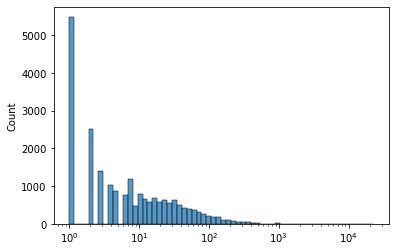

In [18]:
sns.histplot(out_degrees+1, log_scale=True)

<AxesSubplot:ylabel='Count'>

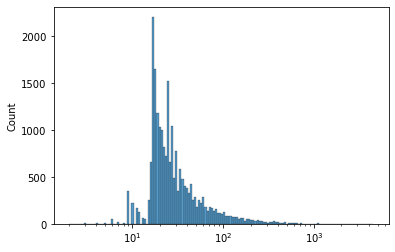

In [19]:
sns.histplot(in_degrees+1, log_scale=True)

In [20]:
import numpy as np
np.median(out_degrees), np.median(in_degrees)

(4.0, 23.0)

In [26]:
num_hubs = (out_degrees > 0.5 * N).sum()
num_hubs

16

In [27]:
MIN_OUT_DEGREE = 3
REAL_FOLLOWERS_MIN = 5

In [28]:
f = (in_degrees >= (num_hubs+REAL_FOLLOWERS_MIN)) & (out_degrees >= 3)

In [29]:
g_filtered = gt.GraphView(g, vfilt=f)
kcore = gt.kcore_decomposition(g_filtered)
g_filtered = gt.GraphView(g_filtered, vfilt=kcore.a >= 2)
v_filt = np.array(g_filtered.get_vertex_filter()[0].a, dtype=bool)
g_filtered = gt.Graph(g_filtered, prune=True)

In [30]:
g_filtered

<Graph object, directed, with 11119 vertices and 741788 edges, at 0x7f17af1b0730>

In [31]:
assort_state = gt.minimize_blockmodel_dl(g_filtered, state=gt.PPBlockState)

In [32]:
state = gt.minimize_nested_blockmodel_dl(g_filtered)

In [33]:
state.print_summary()

l: 0, N: 11119, B: 236
l: 1, N: 236, B: 86
l: 2, N: 86, B: 23
l: 3, N: 23, B: 12
l: 4, N: 12, B: 5
l: 5, N: 5, B: 3
l: 6, N: 3, B: 1
l: 7, N: 1, B: 1


In [34]:
gt.mcmc_equilibrate(assort_state, wait=1000, mcmc_args=dict(niter=10), verbose=True)

niter:     1  count:    0  breaks:  0  min_S: 2187522.2  max_S: 2188827.9  S: 2188827.9  ΔS:      1305.77  moves:  6541 
niter:     2  count:    0  breaks:  0  min_S: 2187522.2  max_S: 2188968.8  S: 2188968.8  ΔS:      140.848  moves: 22775 
niter:     3  count:    1  breaks:  0  min_S: 2187522.2  max_S: 2188968.8  S: 2188858.6  ΔS:     -110.167  moves: 12201 
niter:     4  count:    2  breaks:  0  min_S: 2187522.2  max_S: 2188968.8  S: 2188911.2  ΔS:      52.6185  moves: 25263 
niter:     5  count:    3  breaks:  0  min_S: 2187522.2  max_S: 2188968.8  S: 2188657.8  ΔS:     -253.419  moves: 24019 
niter:     6  count:    4  breaks:  0  min_S: 2187522.2  max_S: 2188968.8  S: 2188297.1  ΔS:     -360.753  moves: 10900 
niter:     7  count:    5  breaks:  0  min_S: 2187522.2  max_S: 2188968.8  S: 2187956.5  ΔS:     -340.505  moves: 38210 
niter:     8  count:    6  breaks:  0  min_S: 2187522.2  max_S: 2188968.8  S: 2187836.5  ΔS:     -120.074  moves: 25894 
niter:     9  count:    7  break

(2177047.395616137, 1494646481, 199004245)

In [35]:
gt.mcmc_equilibrate(assort_state, force_niter=1000, mcmc_args=dict(niter=10, beta=np.inf), verbose=True)

niter:     1  count:    0  breaks:  0  min_S: 2176178.5  max_S: 2177047.4  S: 2176178.5  ΔS:     -868.848  moves:  2581 
niter:     2  count:    0  breaks:  0  min_S: 2175705.0  max_S: 2177047.4  S: 2175705.0  ΔS:     -473.517  moves:  4283 
niter:     3  count:    0  breaks:  0  min_S: 2175398.1  max_S: 2177047.4  S: 2175398.1  ΔS:     -306.928  moves:  1676 
niter:     4  count:    0  breaks:  0  min_S: 2175202.7  max_S: 2177047.4  S: 2175202.7  ΔS:     -195.448  moves:  4362 
niter:     5  count:    0  breaks:  0  min_S: 2174981.2  max_S: 2177047.4  S: 2174981.2  ΔS:     -221.498  moves: 11616 
niter:     6  count:    0  breaks:  0  min_S: 2174810.8  max_S: 2177047.4  S: 2174810.8  ΔS:     -170.363  moves:  1091 
niter:     7  count:    0  breaks:  0  min_S: 2174674.6  max_S: 2177047.4  S: 2174674.6  ΔS:     -136.238  moves:  1541 
niter:     8  count:    0  breaks:  0  min_S: 2174548.3  max_S: 2177047.4  S: 2174548.3  ΔS:     -126.265  moves:  5316 
niter:     9  count:    0  break

(2172985.5465978254, 120912140, 4752020)

In [36]:
gt.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10), verbose=True)

niter:     1  count:    0  breaks:  0  min_S: 1903322.0  max_S: 1905800.8  S: 1903322.0  ΔS:     -2478.84  moves:  1001 
niter:     2  count:    0  breaks:  0  min_S: 1901606.8  max_S: 1905800.8  S: 1901606.8  ΔS:     -1715.19  moves:  1555 
niter:     3  count:    0  breaks:  0  min_S: 1899875.0  max_S: 1905800.8  S: 1899875.0  ΔS:     -1731.86  moves:   910 
niter:     4  count:    0  breaks:  0  min_S: 1898484.2  max_S: 1905800.8  S: 1898484.2  ΔS:     -1390.73  moves:  1289 
niter:     5  count:    0  breaks:  0  min_S: 1896960.7  max_S: 1905800.8  S: 1896960.7  ΔS:     -1523.57  moves:  1485 
niter:     6  count:    0  breaks:  0  min_S: 1895828.5  max_S: 1905800.8  S: 1895828.5  ΔS:     -1132.20  moves:  2550 
niter:     7  count:    0  breaks:  0  min_S: 1894789.1  max_S: 1905800.8  S: 1894789.1  ΔS:     -1039.40  moves:  3692 
niter:     8  count:    0  breaks:  0  min_S: 1893749.6  max_S: 1905800.8  S: 1893749.6  ΔS:     -1039.46  moves:  1522 
niter:     9  count:    0  break

(1856533.9557082008, 3233380059, 57357897)

In [37]:
gt.mcmc_equilibrate(state, force_niter=5000, mcmc_args=dict(niter=10, beta=np.inf), verbose=True)

niter:     1  count:    0  breaks:  0  min_S: 1856431.1  max_S: 1856534.0  S: 1856431.1  ΔS:     -102.878  moves:   460 
niter:     2  count:    0  breaks:  0  min_S: 1856344.2  max_S: 1856534.0  S: 1856344.2  ΔS:     -86.8996  moves:   192 
niter:     3  count:    0  breaks:  0  min_S: 1856240.1  max_S: 1856534.0  S: 1856240.1  ΔS:     -104.091  moves:  1447 
niter:     4  count:    0  breaks:  0  min_S: 1856192.9  max_S: 1856534.0  S: 1856192.9  ΔS:     -47.1984  moves:   378 
niter:     5  count:    0  breaks:  0  min_S: 1856156.1  max_S: 1856534.0  S: 1856156.1  ΔS:     -36.7431  moves:  1709 
niter:     6  count:    0  breaks:  0  min_S: 1856099.9  max_S: 1856534.0  S: 1856099.9  ΔS:     -56.2861  moves:   578 
niter:     7  count:    0  breaks:  0  min_S: 1856056.3  max_S: 1856534.0  S: 1856056.3  ΔS:     -43.5223  moves:  1366 
niter:     8  count:    0  breaks:  0  min_S: 1856037.3  max_S: 1856534.0  S: 1856037.3  ΔS:     -18.9873  moves:   270 
niter:     9  count:    0  break

KeyboardInterrupt: 

In [38]:
state.print_summary()

l: 0, N: 11119, B: 385
l: 1, N: 385, B: 120
l: 2, N: 120, B: 51
l: 3, N: 51, B: 21
l: 4, N: 21, B: 8
l: 5, N: 8, B: 4
l: 6, N: 4, B: 1
l: 7, N: 1, B: 1


In [39]:
from collections import Counter
Counter(state.project_level(0).get_blocks().a).most_common()

[(8640, 294),
 (7048, 280),
 (9899, 273),
 (7451, 271),
 (9840, 248),
 (10821, 189),
 (7360, 187),
 (1083, 138),
 (9847, 125),
 (2991, 123),
 (11067, 121),
 (4757, 114),
 (8278, 113),
 (10159, 113),
 (9091, 109),
 (5251, 104),
 (5284, 103),
 (4743, 102),
 (6289, 101),
 (8649, 101),
 (10778, 99),
 (1200, 93),
 (984, 92),
 (10440, 91),
 (4781, 91),
 (57, 88),
 (5906, 84),
 (10367, 83),
 (1358, 81),
 (329, 77),
 (6919, 72),
 (4470, 72),
 (7946, 71),
 (1656, 71),
 (2253, 69),
 (4096, 66),
 (7272, 65),
 (1289, 65),
 (8992, 64),
 (6341, 63),
 (6897, 62),
 (8276, 61),
 (5371, 59),
 (7669, 57),
 (2594, 57),
 (4623, 56),
 (2016, 56),
 (136, 55),
 (5390, 55),
 (5941, 54),
 (2967, 53),
 (673, 52),
 (7741, 50),
 (2232, 50),
 (1406, 49),
 (7296, 49),
 (501, 49),
 (5383, 48),
 (5786, 48),
 (5867, 46),
 (9543, 46),
 (2962, 45),
 (6355, 45),
 (8913, 45),
 (8091, 44),
 (9365, 44),
 (3404, 43),
 (4824, 43),
 (6994, 43),
 (4435, 43),
 (3021, 42),
 (5373, 42),
 (7652, 42),
 (1157, 42),
 (2323, 41),
 (4185

In [47]:
assort_state.entropy()

2172985.546609599

In [51]:
df_filtered = df[v_filt].copy()
df_filtered.reset_index(inplace=True, drop=True)

In [59]:
import pickle
pickle.dump(assort_state, open("output/assort_state.pkl", "wb"))
pickle.dump(state, open("output/nested_state.pkl", "wb"))

In [62]:
pickle.dump(g, open("output/g.pkl", "wb"))
pickle.dump(g_filtered, open("output/g_filtered.pkl", "wb"))
pickle.dump(df, open("output/df.pkl", "wb"))
pickle.dump(df_filtered, open("output/df_filtered.pkl", "wb"))